# Modelowanie szeregów  czasowych  z autokorelacją

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [4]:
def check_time_series_stationary(y, rolling_len=12):
    
    y = pd.Series(y)
    df_test = adfuller(y)
    
    if df_test[1] < 0.05:
        print('Szereg jest stacjonarny')
    
    else:
        print('Szereg jest niestacjonarny')
    
    print("{0:^32s}".format("Dickey-Fuller Test"))
    print("-"*32+"\n")
    
    print("{0:<20s}: {1:>10.4f}".format('Test Statistic', df_test[0]))
    print("{0:<20s}: {1:>10.4f}".format('p-value', df_test[1]))
    print("-"*32+"\n")
    
    rolling_mean = y.rolling(rolling_len).mean()
    rolling_var = y.rolling(rolling_len).var()

    plt.plot(y)
    plt.plot(rolling_mean, label="Rolling mean")
    plt.plot(rolling_var, label="Rolling var")
    plt.legend()
    plt.show()
    
    print("{0:^32s}".format("Autocorrelation plot"))
    print("-"*32+"\n")
    
    pd.plotting.autocorrelation_plot(y)
    plt.show()

## Graficzna analiza przebiegu funkcji ACF i PACF

- jeśli autokorelacja próbkowa $\text{ACF}(h)$ znajduje się pomiędzy przedziałami ufności $\pm 1,96 \sqrt{n}$ dla $h > q$, to spodziewamy się, że dane są realizacją procesu $\text{MA}(q)$;
- jeśli cząstkowa autokorelacja próbkowa $\text{PACF}(h)$ znajduje się pomiędzy przedziałami ufności $\pm 1,96 \sqrt{n}$ dla $h > p$, to spodziewamy się, że dane są realizacją procesu $\text{AR}(p)$;

## Model średniej ruchomej - $\text{MA}(q)$

**Modelem średniej ruchomej rzędu $q$** nazywamy stacjonarny szereg $Y_t$ spełniający równanie:
$$Y_t = \mu+ \varepsilon_t + \sum_{i=1}^q \theta_i\cdot \varepsilon_{t-i},$$
gdzie $\theta_1, \theta_2, \ldots, \theta_{q}$ są współczynnikami modelu oraz $\varepsilon_t$ to biały szum.

## Zadanie - model MA(1)

Wygeneruj 100 elementowy szereg MA(1): $Y_t = \varepsilon_t + 0.9 \cdot \varepsilon_{t-1}$. Następnie sporządź wykresy ACF i PACF (`plot_acf` i `plot_pacf` z `statsmodels.graphics.tsaplots`).

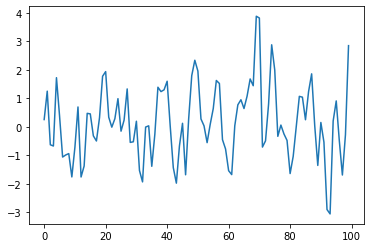

In [5]:
np.random.seed(128)
N = 101
e = np.random.normal(0, 1, N)
ma1 = np.array([e[i] + 0.9 * e[i-1] for i in range(1, N)])

plt.plot(ma1)
plt.show()

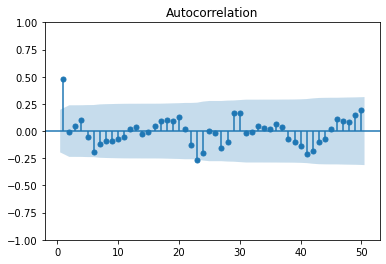

In [6]:
# funkcja autokorelacji szeregu

plot_acf(ma1, lags = 50, zero = False)
plt.show()

$Y_t = \mu + \epsilon_t + \theta
\epsilon_{t-1}$

In [19]:
# ARIMA: order = (AR, I, MA)

model_ma1 = ARIMA(endog = ma1, order=(0, 0, 1))  # MA(1) --> który punkt wystaje poza przedział jako pierwszy?
model_ma1 = model_ma1.fit()

model_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -137.091
Date:                Sun, 04 Jun 2023   AIC                            280.181
Time:                        13:10:52   BIC                            287.997
Sample:                             0   HQIC                           283.344
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.188      0.898      0.369      -0.200       0.538
ma.L1          0.9568      0.042     22.966      0.000       0.875       1.038
sigma2         0.8862      0.111      7.949      0.000       0.668       1.105
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.87
Prob(Q):                              0.89   Prob(JB):                         0.14
Heteroskedasticity (H):               2.18   Skew:                             0.35
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# poprzednie podsumowanie modelu pokazuje, że wyraz wolny jest nieistotny (czyli brak trendu, zgodnie z symulacją)

model_ma1 = ARIMA(endog = ma1, order=(0, 0, 1), trend='n')
model_ma1 = model_ma1.fit()

model_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -137.514
Date:                Sun, 04 Jun 2023   AIC                            279.027
Time:                        13:10:56   BIC                            284.237
Sample:                             0   HQIC                           281.136
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9574      0.041     23.102      0.000       0.876       1.039
sigma2         0.8936      0.107      8.316      0.000       0.683       1.104
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.87
Prob(Q):                              0.89   Prob(JB):                         0.14
Heteroskedasticity (H):               2.27   Skew:                             0.35
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Zadanie - model MA(2)
Wygeneruj 100 elementowy szereg MA(2): $Y_t = \varepsilon_t + 0.9 \cdot \varepsilon_{t-1} + 0.7 * \varepsilon_{t-2}$.

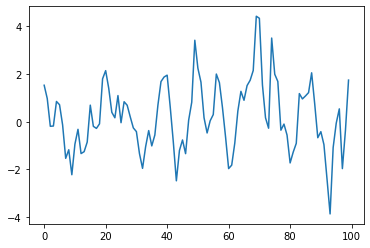

In [11]:
np.random.seed(128)
N = 101
e = np.random.normal(0, 1, N)
ma2 = np.array([e[i] + 0.9 * e[i-1] + 0.7 * e[i-2] for i in range(1, N)])

plt.plot(ma2)
plt.show()

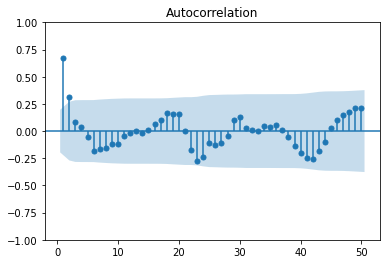

In [12]:
# funkcja autokorelacji szeregu

plot_acf(ma2, lags = 50, zero = False)
plt.show()

In [13]:
# ARIMA: order = (AR, I, MA)

model_ma2 = ARIMA(endog = ma2, order=(0, 0, 2))
model_ma2 = model_ma2.fit()

model_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -134.898
Date:                Sun, 04 Jun 2023   AIC                            277.796
Time:                        13:02:22   BIC                            288.217
Sample:                             0   HQIC                           282.014
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2631      0.288      0.915      0.360      -0.300       0.827
ma.L1          1.0321      0.065     15.891      0.000       0.905       1.159
ma.L2          0.8581      0.055     15.574      0.000       0.750       0.966
sigma2         0.8434      0.113      7.446      0.000       0.621       1.065
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 1.97
Prob(Q):                              0.76   Prob(JB):                         0.37
Heteroskedasticity (H):               2.10   Skew:                             0.21
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
model_ma2 = ARIMA(endog = ma2, order=(0, 0, 2), trend='n')
model_ma2 = model_ma2.fit()

model_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -135.396
Date:                Sun, 04 Jun 2023   AIC                            276.791
Time:                        13:03:23   BIC                            284.607
Sample:                             0   HQIC                           279.954
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0338      0.063     16.365      0.000       0.910       1.158
ma.L2          0.8603      0.053     16.330      0.000       0.757       0.964
sigma2         0.8516      0.116      7.356      0.000       0.625       1.079
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.75   Prob(JB):                         0.39
Heteroskedasticity (H):               2.18   Skew:                             0.21
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Model autoregresji rzędu $p$ - $\text{AR}(p)$

**Modelem autoregresji rzędu $p$** nazywamy stacjonarny szereg czasowy $Y_t$ spełniający równanie:
$$Y_t = \mu+\sum_{i=1}^p \phi_i\cdot Y_{t-i} + \varepsilon_t,$$
gdzie $\phi_1, \phi_2, \ldots, \phi_p$ są współczynnikami modelu oraz $\varepsilon_t$ to biały szum.

## Zadanie - model AR(1) 

Wygeneruj 100 elementowy szereg AR(1): $Y_t = 0.8\cdot Y_{t-1} + \varepsilon_t = 0.8\cdot (0.8\cdot Y_{t-2}+\varepsilon_{t-1})+\varepsilon_{t}$. Następnie sporządź wykresy ACF i PACF.

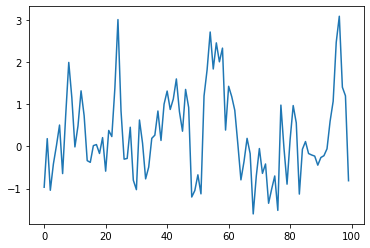

In [15]:
# szereg z procesu AR(1): nie rozpatrujemy pierwszych 100 obserwacji, aby pozbyć się wpływu punktu początkowego
# (musimy od jakiegoś zacząć, bo w teorii AR idzie od czasu t = -oo do t = oo --> PATRZ: ar1[0] = 10)

np.random.seed(128)
N = 201
e = np.random.normal(0, 1, N)
ar1 = np.zeros(N)

for i in range(1, N):
    ar1[i] = 0.8 * ar1[i-1] + e[i]

ar1 = ar1[101:]

plt.plot(ar1)
plt.show()

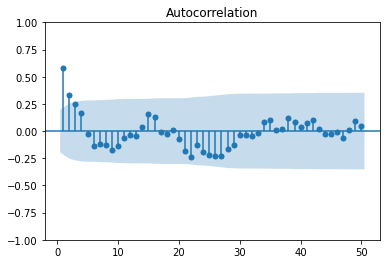

In [16]:
# funkcja autokorelacji szeregu ACF (to sugeruje model MA(2)) --> pośrednia (poprzez szum) kolejnych wartości

plot_acf(ar1, lags = 50, zero = False)
plt.show()

/home/mdabrowski-phd/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


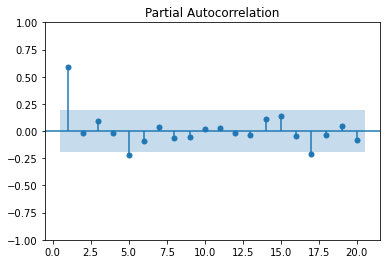

In [17]:
# funkcja cząstkowej autokorelacji szeregu PACF --> bezpośrednia zależność w kolejnych krokach czasowych

plot_pacf(ar1, lags = 20, zero = False)
plt.show()

In [21]:
model_ar1 = ARIMA(endog = ar1, order=(1, 0, 0))
model_ar1 = model_ar1.fit()

model_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -123.463
Date:                Sun, 04 Jun 2023   AIC                            252.926
Time:                        13:18:38   BIC                            260.742
Sample:                             0   HQIC                           256.089
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2705      0.207      1.306      0.192      -0.136       0.677
ar.L1          0.5939      0.077      7.681      0.000       0.442       0.745
sigma2         0.6887      0.106      6.527      0.000       0.482       0.895
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.85   Prob(JB):                         0.67
Heteroskedasticity (H):               1.08   Skew:                             0.17
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# wyraz wolny jest nieistotny (podsumowanie poprzedniego modelu)

model_ar1 = ARIMA(endog = ar1, order=(1, 0, 0), trend='n')
model_ar1 = model_ar1.fit()

model_ar1.summary()  # lepsze dopasowanie współczynnika modelu (0.62 kontra 0.59 wcześniej, prawdziwa: 0.8)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -124.277
Date:                Sun, 04 Jun 2023   AIC                            252.554
Time:                        13:19:39   BIC                            257.765
Sample:                             0   HQIC                           254.663
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6250      0.069      8.997      0.000       0.489       0.761
sigma2         0.6996      0.104      6.720      0.000       0.496       0.904
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.94   Prob(JB):                         0.72
Heteroskedasticity (H):               1.04   Skew:                             0.15
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
# model ARIMA(1, 0, 2) = ARMA(1, 2) na podstawie wykresów ACF i PACF

model_arma12 = ARIMA(endog = ar1, order=(1, 0, 2))
model_arma12 = model_arma12.fit()

model_arma12.summary()  # dopasowanie nie jest lepsze, a model zawiera więcej parametrów (część nieistotnych)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -123.016
Date:                Sun, 04 Jun 2023   AIC                            256.031
Time:                        13:28:08   BIC                            269.057
Sample:                             0   HQIC                           261.303
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2687      0.213      1.263      0.207      -0.148       0.686
ar.L1          0.6508      0.231      2.815      0.005       0.198       1.104
ma.L1         -0.0157      0.270     -0.058      0.954      -0.545       0.513
ma.L2         -0.1087      0.192     -0.567      0.571      -0.485       0.267
sigma2         0.6824      0.108      6.300      0.000       0.470       0.895
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.91
Prob(Q):                              0.90   Prob(JB):                         0.63
Heteroskedasticity (H):               1.11   Skew:                             0.21
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Zadanie - model AR(2) 

Wygeneruj 100 elementowy szereg AR(2): $Y_t = 0.7\cdot Y_{t-2} + 0.8\cdot Y_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.

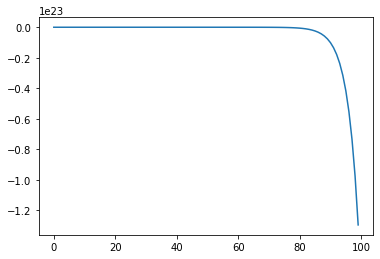

In [27]:
np.random.seed(128)
N = 201
e = np.random.normal(0, 1, N)
ar2 = np.zeros(N)

for i in range(2, N):
    ar2[i] = 0.7 * ar2[i-2] + 0.8 * ar2[i-1] + e[i]

ar2 = ar2[101:]

plt.plot(ar2)  # proces jest bardzo niestacjonarny !! (typowe dla procesów AR, zależy od stasunku współczynników)
plt.show()

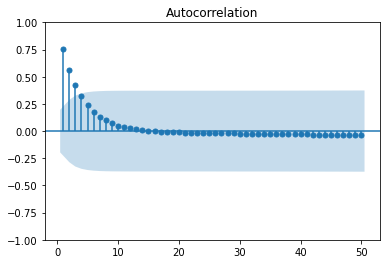

/home/mdabrowski-phd/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


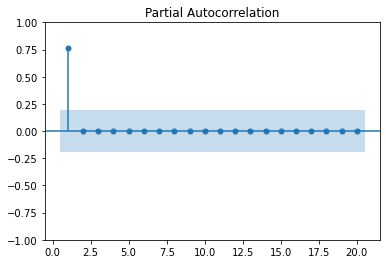

In [30]:
# funkcje ACF oraz PACF wyglądają "normalnie", sugerują modelowanie ARMA (które nie będzie miało sensu ...)

plot_acf(ar2, lags = 50, zero = False)  # UWAGA: łagodne opadanie (gładkość)
plt.show()

plot_pacf(ar2, lags = 20, zero = False)  # UWAGA: szybki zanik wartości odstających do zera
plt.show()

## Model autoregresji ruchomej średniej - $\text{ARMA}(p, q)$

**Modelem autoregresji ruchomej średniej** nazywamy stacjonarny szereg czasowy $Y_t$ spełniający równanie:
$$Y_t = \mu+\sum_{i=1}^p \phi_i\cdot Y_{t-i} + \sum_{j=1}^q \theta_j \cdot \varepsilon_{t-j} + \varepsilon_t,$$
gdzie $\phi_1, \phi_2, \ldots, \phi_p$ oraz  $\theta_1, \theta_2, \ldots, \theta_{q}$ są współczynnikami modelu oraz $\varepsilon_t$ to biały szum.

## Zadanie - model ARMA(1, 1)
Wygeneruj 1000 elementowy szereg ARMA(1, 1): $Y_t = 0.7\cdot Y_{t-1} + 0.8\cdot \varepsilon_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.

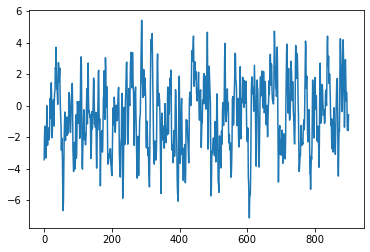

In [41]:
np.random.seed(129)
N5 = 1001
e = np.random.normal(0, 1, N5)
arma = 10 * np.ones(N5)

for i in range(1, N5):
    arma[i] = 0.7 * arma[i-1] + 0.8 * e[i-1] + e[i]

arma = arma[101:]

plt.plot(arma)
plt.show()

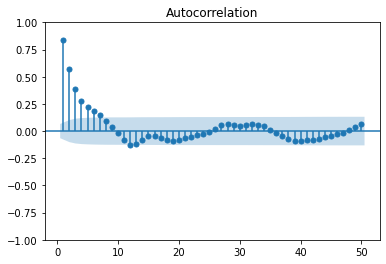

/home/mdabrowski-phd/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


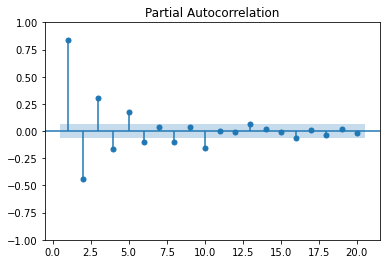

In [45]:
plot_acf(arma, lags = 50, zero = False)
plt.show()

plot_pacf(arma, lags = 20, zero = False)
plt.show()

In [46]:
# model sugerowany przez wykresy ACF i PACF (zbyt skomplikowany ...)

model_arma = ARIMA(endog = arma, order=(6, 0, 7), trend='n')
model_arma = model_arma.fit()

model_arma.summary()

/home/mdabrowski-phd/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  900
Model:                 ARIMA(6, 0, 7)   Log Likelihood               -1257.929
Date:                Sun, 04 Jun 2023   AIC                           2543.857
Time:                        13:45:43   BIC                           2611.091
Sample:                             0   HQIC                          2569.541
                                - 900                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1325      0.741      1.529      0.126      -0.319       2.584
ar.L2         -0.4351      0.830     -0.524      0.600      -2.062       1.192
ar.L3          0.3272      0.378      0.865      0.387      -0.414       1.069
ar.L4         -0.7533      0.340     -2.214      0.027      -1.420      -0.086
ar.L5          0.4003      0.676      0.592      0.554      -0.925       1.726
ar.L6          0.0286      0.432      0.066      0.947      -0.819       0.876
ma.L1          0.3437      0.739      0.465      0.642      -1.105       1.792
ma.L2         -0.2215      0.357     -0.621      0.535      -0.920       0.477
ma.L3         -0.1416      0.304     -0.466      0.642      -0.738       0.455
ma.L4          0.4071      0.253      1.610      0.107      -0.088       0.903
ma.L5          0.5056      0.448      1.128      0.259      -0.373       1.384
ma.L6          0.0133      0.418      0.032      0.975      -0.806       0.833
ma.L7          0.0795      0.091      0.878      0.380      -0.098       0.257
sigma2         0.9590      0.048     19.811      0.000       0.864       1.054
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.75   Prob(JB):                         0.42
Heteroskedasticity (H):               0.96   Skew:                            -0.04
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
# model bardzo dobrze oddaje rzeczywistość

model_arma = ARIMA(endog = arma, order=(1, 0, 1), trend='n')
model_arma = model_arma.fit()

model_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  900
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1266.775
Date:                Sun, 04 Jun 2023   AIC                           2539.550
Time:                        13:45:54   BIC                           2553.957
Sample:                             0   HQIC                          2545.053
                                - 900                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6993      0.026     27.276      0.000       0.649       0.750
ma.L1          0.7917      0.022     36.686      0.000       0.749       0.834
sigma2         0.9747      0.049     20.009      0.000       0.879       1.070
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                 2.70
Prob(Q):                              0.52   Prob(JB):                         0.26
Heteroskedasticity (H):               0.93   Skew:                            -0.05
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Zadanie - model ARMA(2, 1)
Wygeneruj 1000 elementowy szereg ARMA(2, 1): $Y_t = 0.5\cdot Y_{t-2} + 0.7\cdot Y_{t-1} + 0.8\cdot \varepsilon_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.

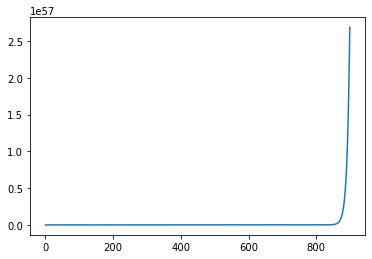

In [48]:
np.random.seed(129)
N5 = 1001
e = np.random.normal(0, 1, N5)
arma2 = 10 * np.ones(N5)

for i in range(2, N5):
    arma2[i] = 0.5 * arma2[i-2] + 0.7 * arma2[i-1] + 0.8 * e[i-1] + e[i]

arma2 = arma2[101:]

plt.plot(arma2)
plt.show()

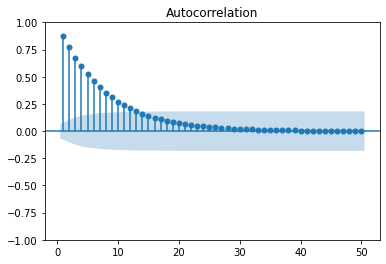

/home/mdabrowski-phd/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


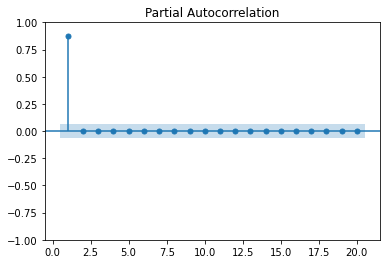

In [49]:
# szereg jest niestacjonarny --> nie ma sensu przeprowadzanie analizy ARMA !!

plot_acf(arma2, lags = 50, zero = False)
plt.show()

plot_pacf(arma2, lags = 20, zero = False)
plt.show()

## Zadanie - szereg z trendem
Wygeneruj 100 elementowy szereg: $Y_t = t+0.7\cdot Y_{t-1} + 0.8\cdot \varepsilon_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.
Zamodeluj szereg na podstawie analizy ACF i PACF.

In [ ]:
np.random.seed(128)
N5 = 201
e = np.random.normal(0, 1, N5)
arima = 10 * np.ones(N5)

for i in range(1, N5):
    arima[i] = i + 0.7 * arima[i-1] + 0.8 * e[i-1] + e[i]

arima = arima[101:]
plt.plot(arima)
plt.show() #jest trend

In [ ]:
arima_diff = arima[1:] - arima[:(len(arima) - 1)]
plt.plot(arima_diff)

In [ ]:
plot_acf(arima_diff, lags = 50, zero = False)
plt.show()

In [ ]:
plot_pacf(arima_diff, lags = 20, zero = False)
plt.show()

In [ ]:
model_arima_diff = ARIMA(endog = arima_diff, order=(2, 0, 2))
model_arima_diff = model_arima_diff.fit()

In [ ]:
model_arima_diff.summary()

In [ ]:
model_arima = ARIMA(endog = arima, order=(2, 1, 2), trend ='t')
model_arima = model_arima.fit()

In [ ]:
model_arima.summary()

## Zadanie - szereg z sezonem i trendem
Wygeneruj 100 elementowy szereg: $Y_t = t+t$	mod $12 +0.7\cdot Y_{t-1} + 0.8\cdot \varepsilon_{t-1} + \varepsilon_t$.
gdzie $t$ mod $12$ oznacza dzielenie modulo (resztę z dzielenia) $t$ przez $12$.
Następnie sporządź wykresy ACF i PACF.
Zamodeluj szereg na podstawie analizy ACF i PACF.

In [ ]:
np.random.seed(128)
N5 = 201
e = np.random.normal(0, 1, N5)
arima = 10 * np.ones(N5)

for i in range(1, N5):
    arima[i] = i + i%12 + 0.7 * arima[i-1] + 0.8 * e[i-1] + e[i]

arima = arima[101:]
plt.plot(arima)
plt.show() #jest trend i sezonowość

In [ ]:
#różnicujemy w celu pozbycia się trendu
arima_diff = arima[1:] - arima[:(len(arima) - 1)]
plt.plot(arima_diff)
plt.show() #patrzymy na szereg zróżnicowany, ale jest sezonowość

In [ ]:
#różnicujemy o 12 celem pozbysia się sezonowości
arima_diff_12 = arima_diff[12:] - arima_diff[:(len(arima_diff) - 12)]
plt.plot(arima_diff_12)
plt.show() #jest stacjonarny

In [ ]:
#analiza pacfów i acfów
plot_acf(arima_diff_12, lags = 20, zero = False)
plot_pacf(arima_diff_12, lags = 20, zero = False)
plt.show()

In [ ]:
m1 = ARIMA(endog=arima_diff_12, order=(4, 0, 2)).fit()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
m2 = SARIMAX(endog=arima, order=(4, 1, 2), seasonal_order = (0, 1, 0, 12), trend='c').fit()

In [ ]:
m2.summary()

In [ ]:
m1.summary()